# Resampling methods
## Cross-validation

**What is it?** By repeatedly drawing samples from training set, we re-fit the model on each of these sample in order to obtain additional information about the fitted model.

**Motivation?** Simply, the difference between test error and training error. Test error is difficult to obtain (absence of large test set) = > estimate test error: either mathematically OR holding out a subset of training data when fitting model and then applying a model on this omitted set.

**What is it good for?**
- Measure how well a given statistical learning procedure can be expected to perform on independent data = the actual estimate of the test MSE is of interest.
- The location of minimum point in the estimated test MSE curve - the actual value of MSE-not important, location of minimum on MSE curve-important

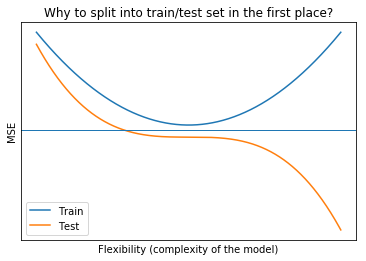

In [50]:
#plot relationship for training and testing set: MSE x flexibility
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

x = np.linspace(-1, 1, 1000)
train = plt.plot(x, x**2 +0.13, label='Train')
test = plt.plot(x, (-x)**3, label='Test')
plt.legend()
plt.axhline(y=0.08,linewidth=1)
#plt.legend([train, test], ['Train', 'Test'])
plt.xlabel('Flexibility (complexity of the model)')
plt.ylabel('MSE')
plt.xticks([], [])
plt.yticks([], [])
plt.title("Why to split into train/test set in the first place?")

plt.show()

**Why not simple "Validation set approach" aka split into two sets** If we split training set randomly many times, test MSE will vary in value, all curves by there shape can tell which model is better(MSE lower) but we do not know the absolute value of MSE, i.e. we run into 2 drawbacks
- MSE varies across different random split of the data
- Model is fit based only on the training data, not the validation one and statistical methods tend to perform worse when trained on fewer observations = > Validation set error rate may OVERESTIMATE the test error rate for the model fit on the entire data set.

In [110]:
from sklearn_pandas import DataFrameMapper
from sklearn.datasets import load_boston

boston = load_boston()
#'The Boston Housing Dataset - contains price of houses in various places in Boston, alongside with crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE)..
#print(boston.data.shape)
#print(boston.feature_names)
#print(boston.DESCR)

X = boston.data
y = boston.target

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import cross_validation
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# Create the regressor
reg_all = LinearRegression()
# Fit the regressor to the training data
reg_all.fit(X_train, y_train)
# Predict on the test data
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error: {}".format(mse))



#with different split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=244)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

print("R^2: {}".format(reg_all.score(X_test, y_test)))
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error: {}".format(mse))

R^2: 0.668482575397
Mean Squared Error: 24.3114269297
R^2: 0.732550767941
Mean Squared Error: 15.1682181612


To get rid off the drawbacks => **LOOCV = Leave One Out Cross Validation**

LOOCV instead of splitting data into two comparable-size-samples, it splits into two samples but only a single observation is used for the validation set, the remaining is testing set. In this approach poor MSE estimate - highly variable because it is based only on one observation.

Therefore take second observation as validation, test again on the remaining. Run this process over all observation, the MSE estimate will be an Average of $MSE_{i}$

**Advantages of LOOCV over Validation set approach?**
- less bias - does not over-estimate test error as much
- performing LOOCV many times will always give same result (there is no randomness in the training/validation set split)

In [111]:
# from sklearn.model_selection import LeaveOneOut 
# loo = LeaveOneOut()
# loo.get_n_splits(X)

# for train_index, test_index in loo.split(X):
#    print("TRAIN:", train_index, "TEST:", test_index)
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]
#    print(X_train, X_test, y_train, y_test)

#can use k-fold cross validation where k=n, i.e. k-fold equivalent of Leave One Out strategy)
from sklearn import cross_validation, linear_model
import numpy as np

loo = cross_validation.LeaveOneOut(len(y)) #k=n
regr = linear_model.LinearRegression()
scores = cross_validation.cross_val_score(regr, X, y, scoring='neg_mean_squared_error', cv=loo)

print("Mean Squared Error: {}".format((-scores).mean()))

Mean Squared Error: 23.7292580812


BUT LOOCV may be expensive, since the model needs to be fitted $n$ times, therefore here comes the  **K-Fold Cross Validation**

**What is K-Fold Cross Validation?** Randomly dividing set of observations into k folds of approximately equal size. The first fold is used for validation, the remaining for testing, the $MSE_{1}$ is computed on the held out set. This process is done k-times, each time different fold is used as a validation set.

$$ CV_{k} = 1/n \sum_{i=1}^{k} MSE_{k} $$

Meaning in fact LOOCV is a type of K-fold with $k=n$

**What is the advantage to use $k=5$ or $k=10$ over $k=n$?**

- Computational: if k=10 CV requires fitting the model procedure only 10 times
- Bias-Variance Trade off: K-Fold may underestimate the test MSE but comes close to identifying the correct level of flexibility = the flexibility level that corresponds to the smallest test MSE.
  - Validation Set Approach - biased because it uses only half of the dataset to fit model, LOOCV on average unbiased, K-fold intermediate level of bias. Therefore from the point of view of bias - LOOCV better, **HOWEVER**
  - LOOCV has higher variance than K-Fold. Why? In LOOCV we are averaging the outputs of n fitted models, each of which trained almost on an identical set od observations, i.e. these outputs are highly correlated. In K-Fold we are averaging the outputs of k fitted models, that are somewhat less correlated. And since the mean of many highly correlated quantities has higher variance than does the mean of many quantities that are not as highly correlated, test error estimate from LOOCV tends to have a higher variance than K-Fold.


*Note: There is a bias-variance trade-off associated with the choice of k in k-fold. Typically k=5 or k=10 as these have been empirically showed to yield test error estimates that suffer neither from excesively high bias nor from very high variance.*




In [112]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

crossval = cross_validation.KFold(len(y), n_folds=10,shuffle=True, random_state=42) 
regr = linear_model.LinearRegression()
scores = cross_validation.cross_val_score(regr, X, y, scoring='neg_mean_squared_error', cv=crossval)
print("Mean Squared Error: {}".format((-scores).mean()))

Mean Squared Error: 23.3631500025


**Cross-Validation on classification problems**

Instead of using MSE to quantify test error, we use number of missclassified observations.
$$ CV_{i} = 1/n \sum_{1}^{n} Err_{i} $$ $$Err_{i} = I(y_{i} \neq \hat{y_{i}}) $$




In [138]:
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_wine


wine = load_wine()
#print(type(wine))
#print(wine.keys())
#print(wine.target_names)
#print(wine.feature_names)
X = wine.data
y = wine.target


# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Instantiate the GridSearchCV object
cv = GridSearchCV(pipeline, parameters, cv=8)
# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set
y_pred = cv.predict(X_test)
r2 = cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R squared: {}".format(r2))
print("MSE: {}".format(mse))

R squared: 0.981481481481
MSE: 0.0185185185185


**Cross Validation vs. Bootstrap?**

Cross Validation - a technique to validate the performance of a model to make sure that we are not overfitting the training dataset. 

Bootstrap - rather used to estimate variance of a parameter / estimate. It is a way of simulating the "correct distribution". However since distribution is unknown, we need to repeat some data points to make sure that we can create these samples from limited data set.

In summary , Cross Validation "splits" the available data-set to create multiple datasets, and Bootstraps "clones" or extrapolates original data-sets to create multiple data-sets. Bootstrap is not a model validation technique or, it is weaker than cross validation if used for model validation.

**Bootstrap Motivation?**

(1) You want to ask a question about a population but you can't. 

(2) So you take a sample and ask the question about the sample instead. 

(3) How close is the sample answer to the population answer? Depends on the structure of the population. How to asses this?

- take repeated samples from the population, ask your question, and see the variability in the answers *(unrealistic)*
- make some assumptions about the shape of the population (normal, binomial distributions..) repeatedly generate samples of the same size as the one you have and again keep asking them the same question *(too many assumptions)* 
- use the information in the sample you actually have to learn about it, i.e. actually sample from your original sample (the sample you have is also a population, just a very small discrete one) Sampling 'with replacement' is just a convenient way to treat the sample like it's a population and to sample from it in a way that reflects its shape.
  - Why is this any good?  Because most samples will, if they're randomly chosen, look quite like the population they came from. 
 
I.e. we arrived to the bootstrap.

In bootstrap, we are pretending that the (large) sample we have is a proxy for our population. Then we draw lots of bootstrap samples and estimate parameters of interest.

### Reference
James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112). New York: springer.